In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Bangalore_traffic_Dataset.csv")

In [2]:
print(df.shape)

(8936, 16)


In [3]:
df.describe()

,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count
count,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000
mean,29236.048120,39.447427,1.375554,80.818041,92.029215,1.570389,108.472096,45.086651,79.950243,75.155597,114.533348
std,13001.808801,10.707244,0.165319,23.533182,16.583341,1.420047,26.003618,20.208460,11.585006,14.409394,36.812573
min,4233.000000,20.000000,1.000039,5.160279,18.739771,0.000000,58.466000,10.006853,60.003933,50.020411,66.000000
25%,19413.000000,31.775825,1.242459,64.292905,97.354990,0.000000,88.826000,27.341191,69.828270,62.545895,94.000000
50%,27600.000000,39.199368,1.500000,92.389018,100.000000,1.000000,105.200000,45.170684,79.992773,75.317610,102.000000
75%,38058.500000,46.644517,1.500000,100.000000,100.000000,2.000000,126.117000,62.426485,89.957358,87.518589,111.000000
max,72039.000000,89.790843,1.500000,100.000000,100.000000,10.000000,194.078000,79.979744,99.993652,99.995049,243.000000


In [4]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,01-01-2022,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,01-01-2022,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,01-01-2022,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,01-01-2022,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,01-01-2022,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


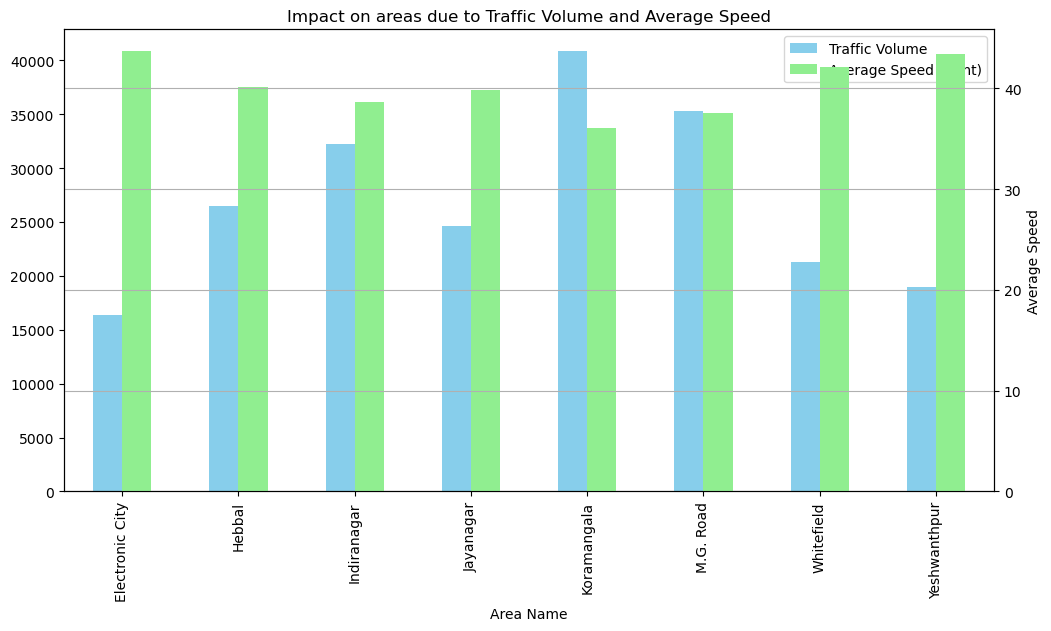

Inference: Koramangala has highest Traffic Volume with comparatively less Average Speed. Koramangala, being a densely populated commercial and residential hub, experiences heavy traffic, especially during peak hours, leading to a slowdown in vehicle movement.


In [13]:
#1. What is the impact on areas due to traffic volumes and average speed?

# Grouping by areas to calculate average traffic volume and average speed
area_impact = df.groupby('Area Name').agg({'Traffic Volume': 'mean', 'Average Speed': 'mean'}).reset_index()

# Plotting grouped bar chart
area_impact.plot(kind='bar', x='Area Name', secondary_y='Average Speed', figsize=(12, 6), color=['skyblue', 'lightgreen'])
plt.title('Impact on areas due to Traffic Volume and Average Speed')
plt.xlabel('Area Name')
plt.ylabel('Average Speed')
plt.grid(True)
plt.show()

print('Inference: Koramangala has highest Traffic Volume with comparatively less Average Speed. Koramangala, being a densely populated commercial and residential hub, experiences heavy traffic, especially during peak hours, leading to a slowdown in vehicle movement.')

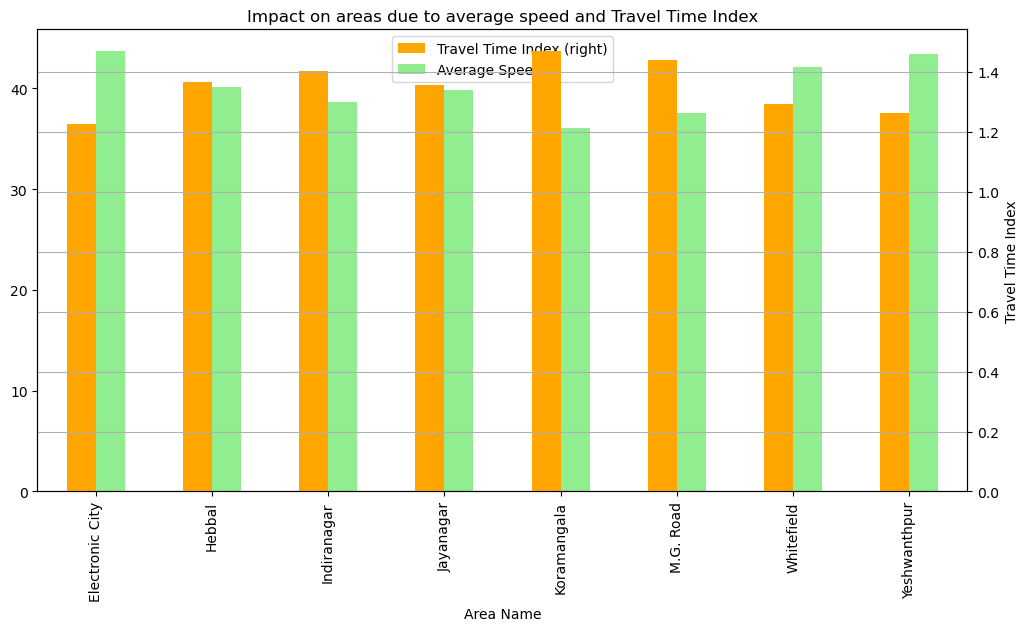

In [6]:
#2. What is the impact on areas due to average speed and Travel Time Index?

# Grouping by areas to calculate TTI and average speed
area_impact = df.groupby('Area Name').agg({'Travel Time Index': 'mean', 'Average Speed': 'mean'}).reset_index()

# Plotting grouped bar chart
area_impact.plot(kind='bar', x='Area Name', secondary_y='Travel Time Index', figsize=(12, 6), color=['orange', 'lightgreen'])
plt.title('Impact on areas due to average speed and Travel Time Index')
plt.xlabel('Area Name')
plt.ylabel('Travel Time Index')
plt.grid(True)
plt.show()

Correlation Matrix:
                   Traffic Volume  Average Speed  Travel Time Index  \
Traffic Volume           1.000000      -0.341138           0.697514   
Average Speed           -0.341138       1.000000          -0.376170   
Travel Time Index        0.697514      -0.376170           1.000000   
Congestion Level         0.837218      -0.360250           0.751573   

                   Congestion Level  
Traffic Volume             0.837218  
Average Speed             -0.360250  
Travel Time Index          0.751573  
Congestion Level           1.000000  


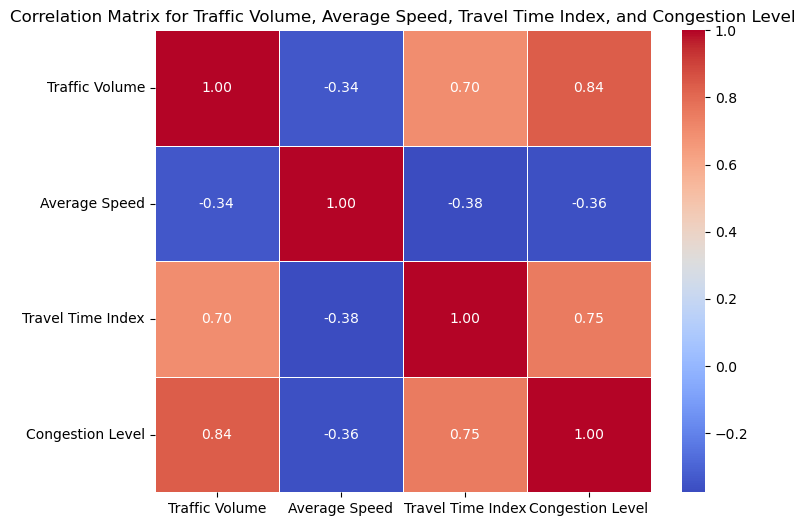

In [7]:
#3. What is correlation between Traffic Volume, Average Speed, Travel Time Index and Congestion Level?

# Select the relevant columns
columns_for_correlation = ['Traffic Volume', 'Average Speed', 'Travel Time Index', 'Congestion Level']
correlation_data = df[columns_for_correlation]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Traffic Volume, Average Speed, Travel Time Index, and Congestion Level')
plt.show()

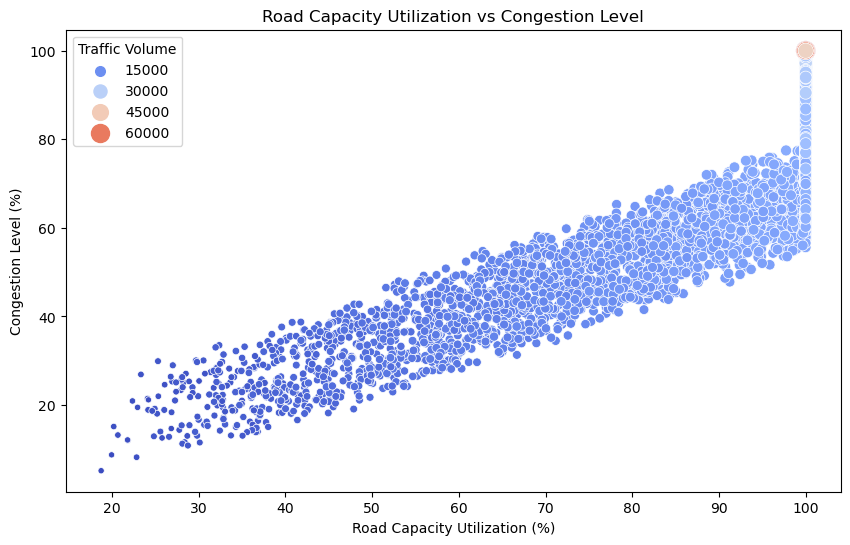

In [8]:
#4. Road Capacity Utilization vs Congestion Level
# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Road Capacity Utilization', y='Congestion Level', hue='Traffic Volume', size='Traffic Volume', sizes=(20, 200), palette='coolwarm')

# Add titles and labels
plt.title('Road Capacity Utilization vs Congestion Level')
plt.xlabel('Road Capacity Utilization (%)')
plt.ylabel('Congestion Level (%)')

# Display the plot
plt.show()

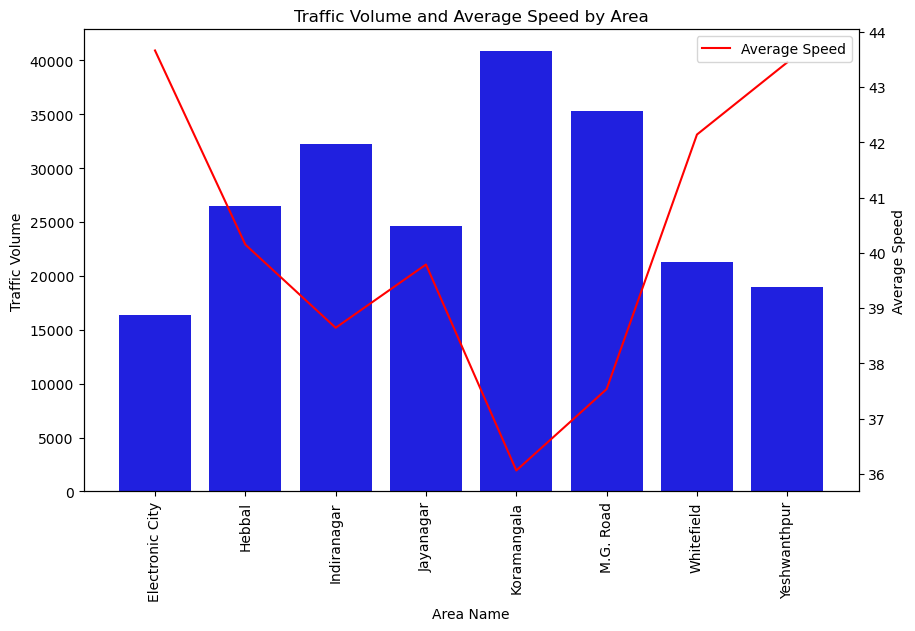

In [3]:
#Q5. How does Traffic Volume vary across different areas and how does this affect Average Speed?
area_traffic_speed = df.groupby('Area Name')[['Traffic Volume', 'Average Speed']].mean().reset_index()

# Plotting the Traffic Volume and Average Speed for each area
plt.figure(figsize=(10, 6))
sns.barplot(x='Area Name', y='Traffic Volume', data=area_traffic_speed, color='blue', label='Traffic Volume')
plt.xticks(rotation=90)
plt.ylabel('Traffic Volume')
plt.twinx()
sns.lineplot(x='Area Name', y='Average Speed', data=area_traffic_speed, color='red', label='Average Speed')
plt.ylabel('Average Speed')
plt.legend()
plt.title('Traffic Volume and Average Speed by Area')
plt.show()

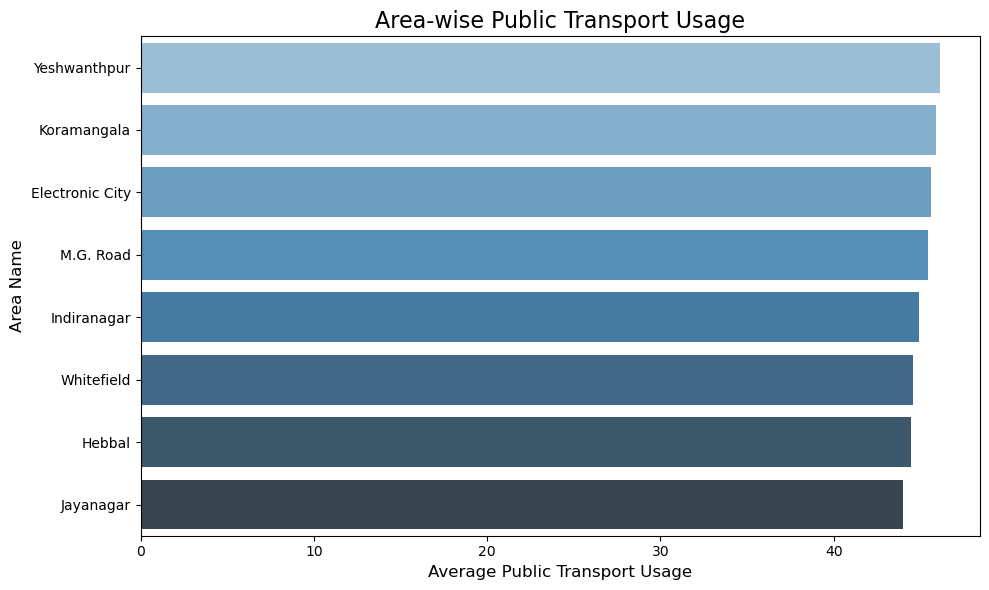

In [11]:
#Q6. Area-wise Public Transport Usage

# Grouping the data by 'Area Name' and calculating the mean public transport usage for each area
area_transport_usage = df.groupby('Area Name')['Public Transport Usage'].mean().reset_index()

# Sorting values to make the bar plot more readable
area_transport_usage = area_transport_usage.sort_values(by='Public Transport Usage', ascending=False)

# Plotting a bar plot for Public Transport Usage across different areas
plt.figure(figsize=(10,6))
sns.barplot(x='Public Transport Usage', y='Area Name', data=area_transport_usage, palette='Blues_d')

# Adding titles and labels
plt.title('Area-wise Public Transport Usage', fontsize=16)
plt.xlabel('Average Public Transport Usage', fontsize=12)
plt.ylabel('Area Name', fontsize=12)

plt.tight_layout()
plt.show()

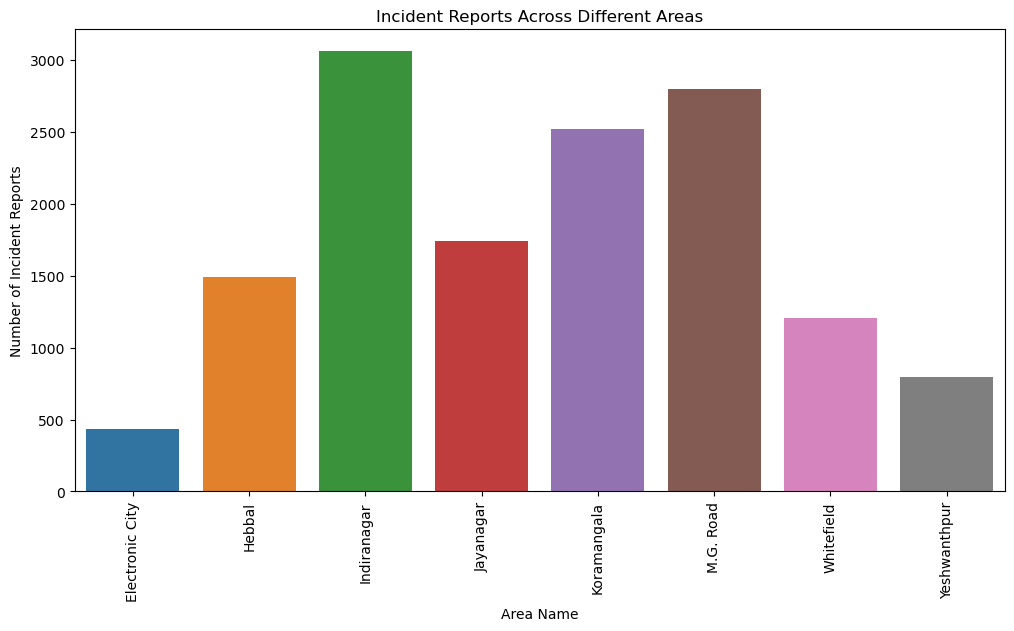

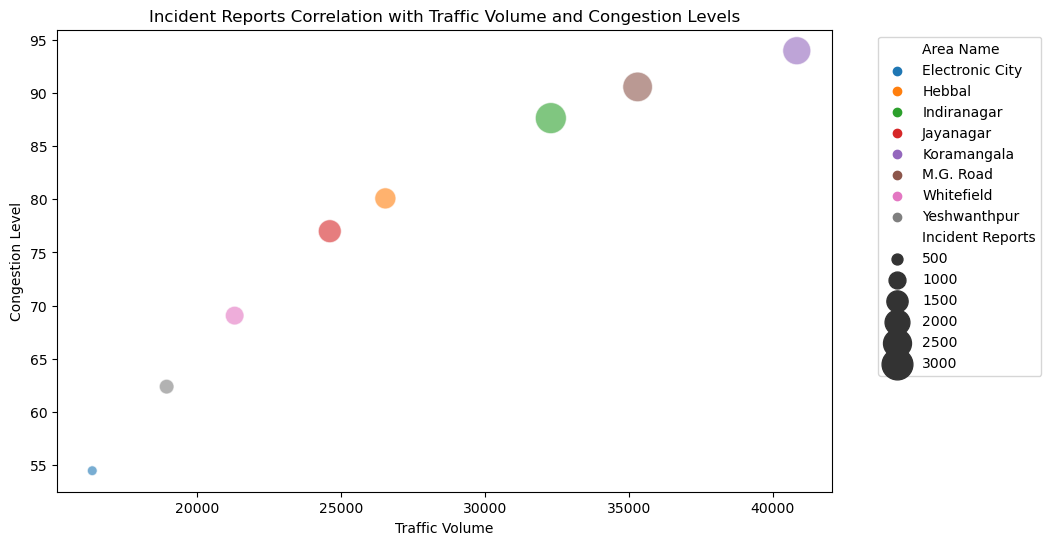

In [4]:
#Q7. How does Incident Reports vary across different areas, and how does it correlate with Traffic Volume and Congestion Levels?

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Group data by 'Area Name' to calculate mean values for Traffic Volume, Congestion Level, and Incident Reports
area_grouped = df.groupby('Area Name').agg({
    'Traffic Volume': 'mean',
    'Congestion Level': 'mean',
    'Incident Reports': 'sum'  # Assuming incident reports are summative
}).reset_index()

# Visualization: Bar plot for Incident Reports across different areas
plt.figure(figsize=(12, 6))
sns.barplot(x='Area Name', y='Incident Reports', data=area_grouped)
plt.xticks(rotation=90)
plt.title('Incident Reports Across Different Areas')
plt.ylabel('Number of Incident Reports')
plt.xlabel('Area Name')
plt.show()

# Scatter plot: Incident Reports vs Traffic Volume and Congestion Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Traffic Volume', y='Congestion Level', size='Incident Reports', data=area_grouped, hue='Area Name', sizes=(50, 500), alpha=0.6)
plt.title('Incident Reports Correlation with Traffic Volume and Congestion Levels')
plt.xlabel('Traffic Volume')
plt.ylabel('Congestion Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


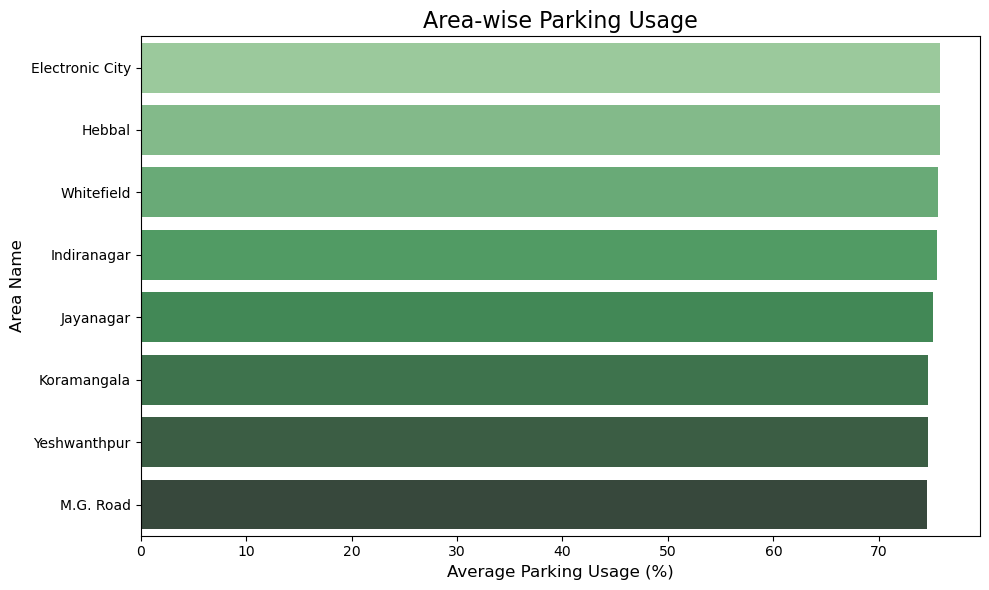

In [3]:
#Q8. Comparing Area-wise Parking Usage
# Group the data by 'Area Name' and calculate the mean parking usage for each area
area_parking_usage = df.groupby('Area Name')['Parking Usage'].mean().reset_index()

# Sort the data for better readability in the plot
area_parking_usage = area_parking_usage.sort_values(by='Parking Usage', ascending=False)

# Plot a bar plot for Parking Usage across different areas
plt.figure(figsize=(10,6))
sns.barplot(x='Parking Usage', y='Area Name', data=area_parking_usage, palette='Greens_d')

# Adding titles and labels
plt.title('Area-wise Parking Usage', fontsize=16)
plt.xlabel('Average Parking Usage (%)', fontsize=12)
plt.ylabel('Area Name', fontsize=12)

plt.tight_layout()
plt.show()

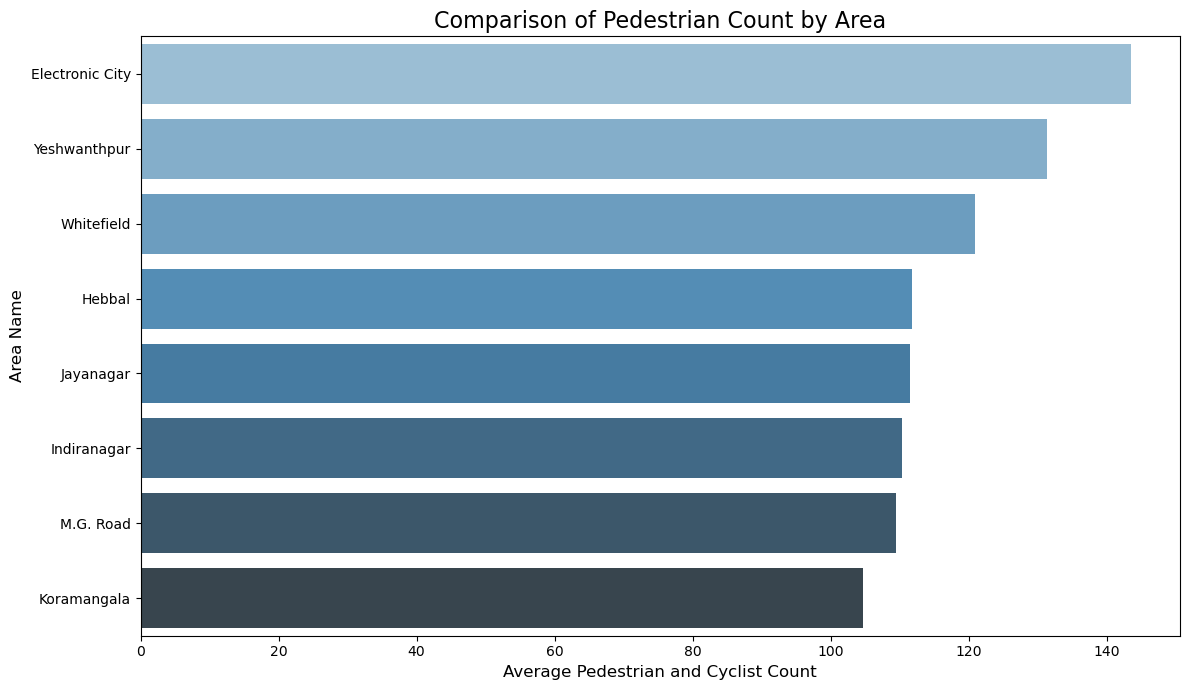

In [7]:
#9. Compare Pedestrian Count with Area

# Group the data by 'Area Name' and calculate the mean Pedestrian Count for each area
area_pedestrian_count = df.groupby('Area Name')['Pedestrian and Cyclist Count'].mean().reset_index()

# Sort the data for better readability in the plot
area_pedestrian_count = area_pedestrian_count.sort_values(by='Pedestrian and Cyclist Count', ascending=False)

# Plot a bar plot for Pedestrian Count across different areas
plt.figure(figsize=(12, 7))
sns.barplot(x='Pedestrian and Cyclist Count', y='Area Name', data=area_pedestrian_count, palette='Blues_d')

# Adding titles and labels
plt.title('Comparison of Pedestrian Count by Area', fontsize=16)
plt.xlabel('Average Pedestrian and Cyclist Count', fontsize=12)
plt.ylabel('Area Name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\G E Saathwik\AppData\Local\Temp\ipykernel_16748\515529840.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_groups = df.groupby('Weather Conditions').mean()


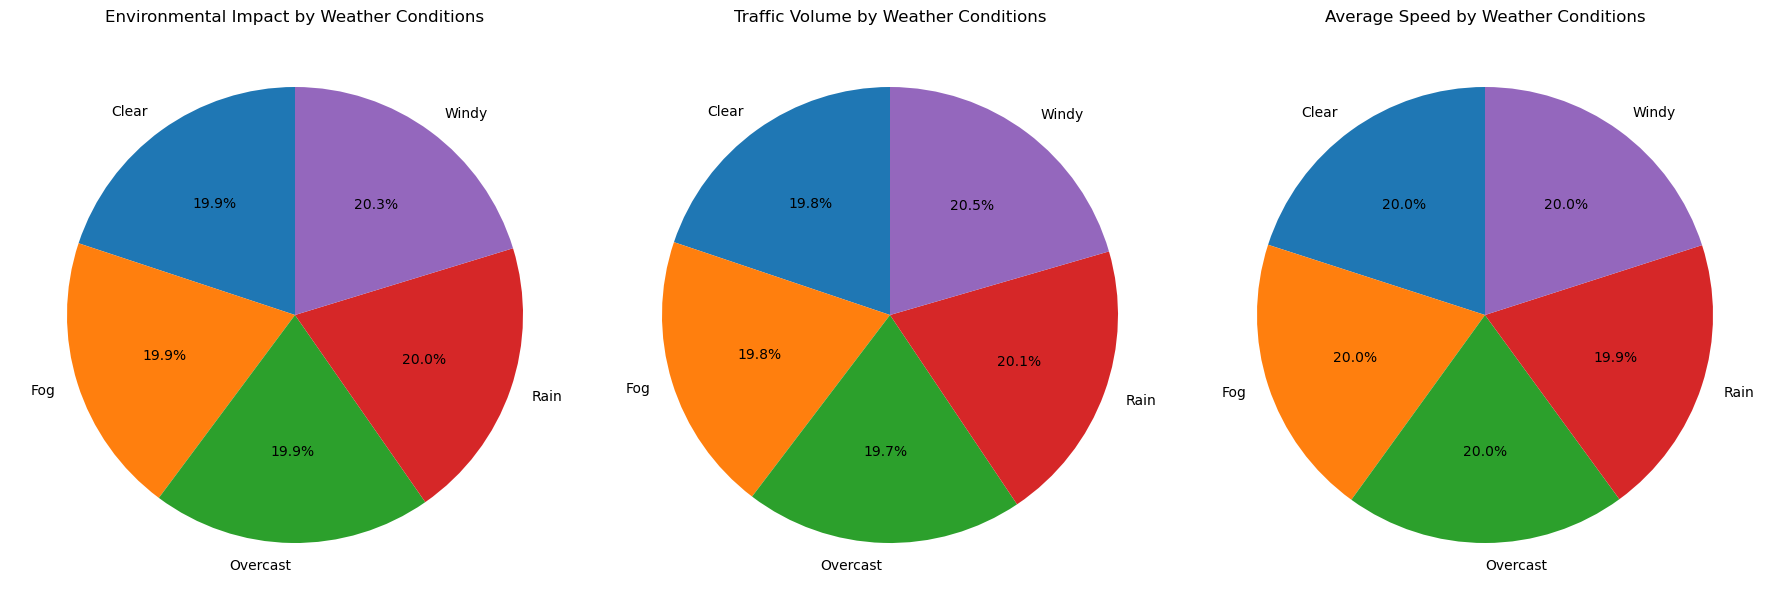

In [3]:
#Q10. Compare Weather conditions with Environmental impact, Traffic Volume and Average Speed
weather_groups = df.groupby('Weather Conditions').mean()

# Plotting pie charts
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Environmental Impact Pie Chart
ax[0].pie(weather_groups['Environmental Impact'], labels=weather_groups.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Environmental Impact by Weather Conditions')

# Traffic Volume Pie Chart
ax[1].pie(weather_groups['Traffic Volume'], labels=weather_groups.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Traffic Volume by Weather Conditions')

# Average Speed Pie Chart
ax[2].pie(weather_groups['Average Speed'], labels=weather_groups.index, autopct='%1.1f%%', startangle=90)
ax[2].set_title('Average Speed by Weather Conditions')

# Displaying the plot
plt.tight_layout()
plt.show()